In [1]:
import zipfile

# Path to the zip file
zip_path = '/content/MangoLeafBD Dataset.zip'  # Replace with the actual path to the zip file
extracted_path = 'path/to/extract/directory/'  # Replace with the desired extraction path

# Extracting the zip file
with zipfile.ZipFile(zip_path, 'r') as zip_ref:
    zip_ref.extractall(extracted_path)

print("Files extracted successfully!")

Files extracted successfully!


In [2]:
pip install numpy scikit-learn pillow


In [3]:
from PIL import Image
import numpy as np
import os
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score


In [4]:
# Define image size for resizing
image_size = (64, 64)
data = []
labels = []

# Specify your dataset folder path
dataset_folder_path = "/content/path/to/extract/directory/MangoLeafBD Dataset"

# Loop through each class folder
for class_label in os.listdir(dataset_folder_path):
    class_folder = os.path.join(dataset_folder_path, class_label)
    if os.path.isdir(class_folder):  # Ensure it's a folder
        for image_file in os.listdir(class_folder):
            image_path = os.path.join(class_folder, image_file)
            try:
                # Open, resize, and convert to RGB
                img = Image.open(image_path).resize(image_size).convert('RGB')
                img_array = np.array(img).flatten()  # Flatten the 64x64x3 image to a 1D array
                data.append(img_array)
                labels.append(class_label)  # Label from folder name
            except Exception as e:
                print(f"Error processing image {image_path}: {e}")

# Convert lists to numpy arrays for easier processing
data = np.array(data)
labels = np.array(labels)
print("Data shape:", data.shape)
print("Labels shape:", labels.shape)


Data shape: (4000, 12288)
Labels shape: (4000,)


In [5]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size=0.2, random_state=42)
print("Training set shape:", X_train.shape)
print("Test set shape:", X_test.shape)


Training set shape: (3200, 12288)
Test set shape: (800, 12288)


In [6]:
# Initialize the Decision Tree Classifier
clf = DecisionTreeClassifier(random_state=42)

# Train the model
clf.fit(X_train, y_train)
print("Model training complete.")


Model training complete.


In [7]:
# Predict on the test set
y_pred = clf.predict(X_test)

# Calculate accuracy
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy * 100:.2f}%")


Model Accuracy: 67.50%


In [8]:
from sklearn.ensemble import RandomForestClassifier


In [9]:
# Initialize the Random Forest Classifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)  # Using 100 trees

# Train the model
rf_clf.fit(X_train, y_train)
print("Random Forest model training complete.")


Random Forest model training complete.


In [10]:
# Predict on the test set
y_pred_rf = rf_clf.predict(X_test)

# Calculate accuracy
accuracy_rf = accuracy_score(y_test, y_pred_rf)
print(f"Random Forest Model Accuracy: {accuracy_rf * 100:.2f}%")


Random Forest Model Accuracy: 88.88%


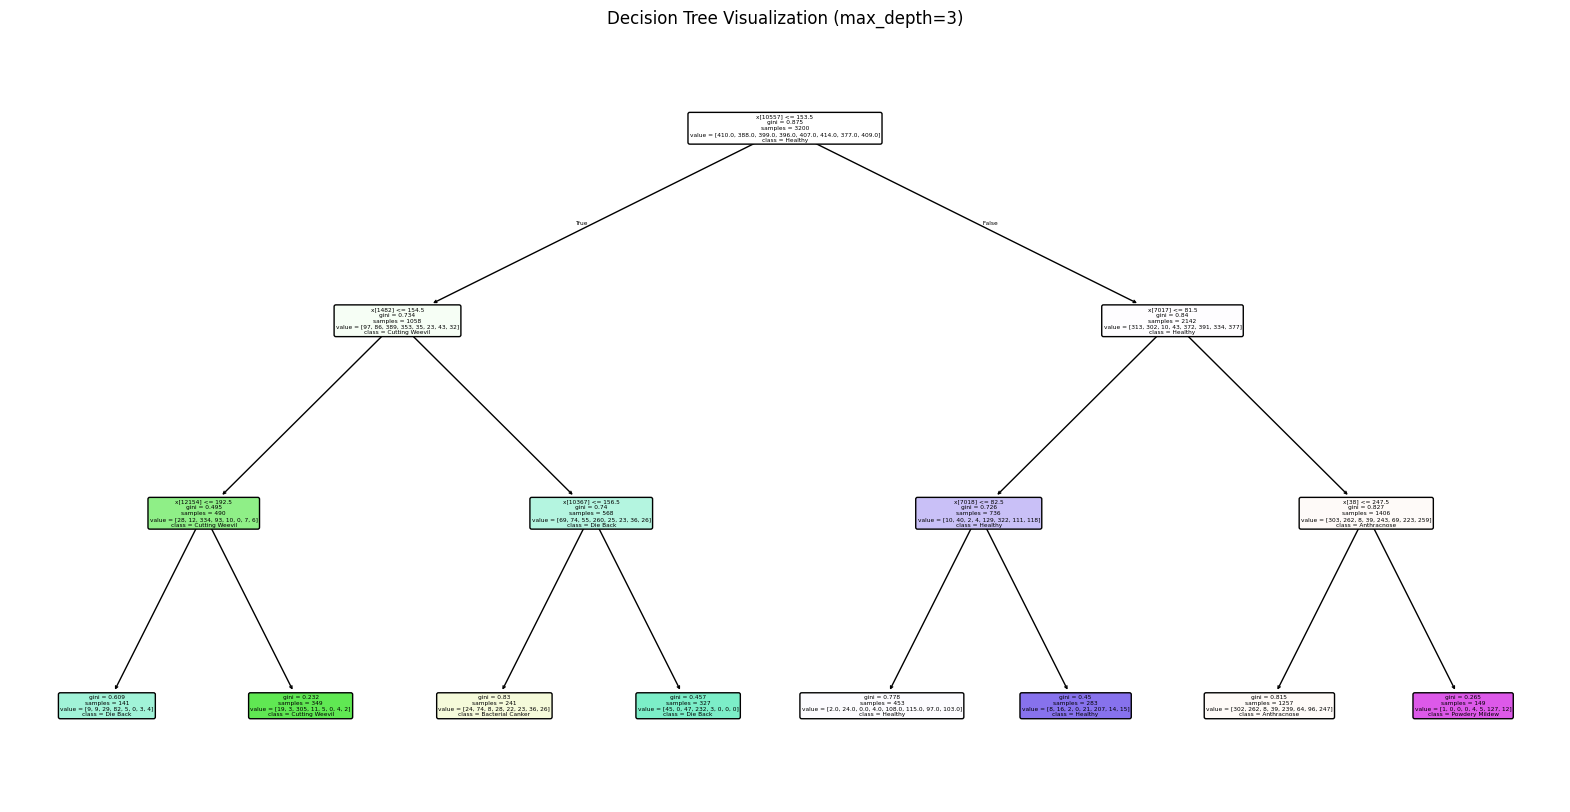

In [11]:
from sklearn.tree import DecisionTreeClassifier, plot_tree
import matplotlib.pyplot as plt

# Train a smaller Decision Tree for better visualization
clf_small = DecisionTreeClassifier(max_depth=3, random_state=42)
clf_small.fit(X_train, y_train)

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(clf_small, filled=True, feature_names=None, class_names=np.unique(y_train), rounded=True)
plt.title("Decision Tree Visualization (max_depth=3)")
plt.show()


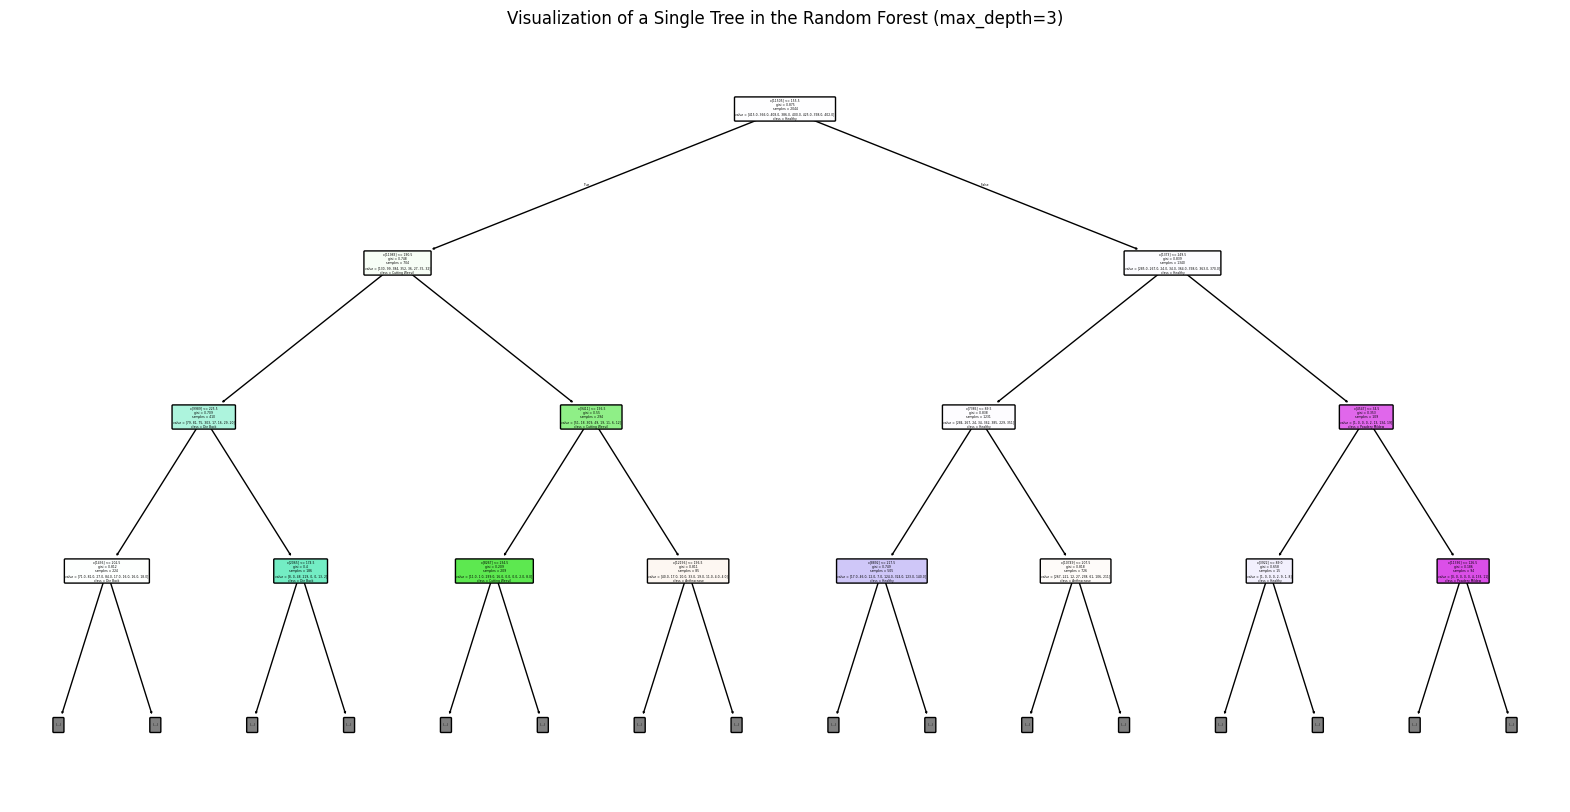

In [12]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt

# Train the Random Forest
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
rf_clf.fit(X_train, y_train)

# Select a single tree from the Random Forest
tree = rf_clf.estimators_[0]  # You can change the index to view other trees

# Plot the tree
plt.figure(figsize=(20, 10))
plot_tree(tree, filled=True, feature_names=None, class_names=np.unique(y_train), rounded=True, max_depth=3)
plt.title("Visualization of a Single Tree in the Random Forest (max_depth=3)")
plt.show()
